In [1]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ema_workbench import save_results, load_results

In [2]:
from ema_workbench import (Model, MultiprocessingEvaluator, SequentialEvaluator, Policy,
                           Scenario, ScalarOutcome)

from ema_workbench.em_framework.evaluators import perform_experiments, SOBOL, LHS
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
from problem_formulation_disagr import get_model_for_problem_formulation2
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume

if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)
 
    model, planning_steps = get_model_for_problem_formulation(3)
  # model2, planning_steps = get_model_for_problem_formulation(3)

    # Build a user-defined scenario and policy:
    reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                        'ID flood wave shape': 4, 'planning steps': 2}
    reference_values.update({'discount rate {}'.format(n): 3.5 for n in planning_steps})
    scen1 = {}

    for key in model.uncertainties:
        name_split = key.name.split('_')

        if len(name_split) == 1:
            scen1.update({key.name: reference_values[key.name]})

        else:
            scen1.update({key.name: reference_values[name_split[1]]})

    ref_scenario = Scenario('reference', **scen1)

    # no dike increase, no warning, none of the rfr
    zero_policy = {'DaysToThreat': 0}
    zero_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
    zero_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
    pol0 = {}
    
    for key in model.levers:
        s1, s2 = key.name.split('_')
        pol0.update({key.name: zero_policy[s2]})

    policy0 = Policy('Policy 0', **pol0)

In [3]:
from ema_workbench.em_framework import get_SALib_problem

problem = get_SALib_problem(model.uncertainties)

In [28]:
# # Perform experiments
# with MultiprocessingEvaluator(model) as evaluator:
#     experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=2, uncertainty_sampling=LHS)

In [29]:
# save_results((experiments, outcomes), './results_LHS.tar.gz')

In [5]:
experiments, outcomes = load_results('results_LHS.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Gebruiker\Documents\GitHub\EPA1361_assignments\v8 final assignment\results_LHS.tar.gz


## Optimization (MORDM)

Question: High epsilon values were used to obtain a smaller solution set with a still reasonable nfe value - how do we justify having such high epsilons?

And for this one regarding how we ideally would need reasonable epsilons, and convergence, and 100 solutions but that it seems impossible

granularity and solution set for epsilon
convergence for furture research due to computation

In [31]:
# ema_logging.log_to_stderr(ema_logging.INFO) 
# from ema_workbench.em_framework.optimization import (HyperVolume,
#                                                      EpsilonProgress)

# convergence_metrics = [EpsilonProgress()]

# # Epsilon values - could be lower but for time sake we kept it 0.01 (1/100)
# espilon = [20000000,0.01,20000000,0.01,20000000,0.01,200000000,0.01,200000000,0.01]

# nfe = 5000  
    
# with MultiprocessingEvaluator(model) as evaluator:
#     results_june12, convergence_june12 = evaluator.optimize(nfe=nfe,
#                                                 searchover='levers',
#                                                 epsilons=espilon,
#                                                 convergence=convergence_metrics,
#                                                 reference=ref_scenario
#                                                 )

# save_results((results_june12, convergence_june12), './results_june14.tar.gz')

In [6]:
experiments_june12, convergence_june12 = load_results('results_opt_final.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Gebruiker\Documents\GitHub\EPA1361_assignments\v8 final assignment\results_opt_final.tar.gz


In [33]:
experiments_june12

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1,1,1,0,1,1,1,0,1,1,...,2.132601e+08,0.000000,2.686941e+07,0.000692,2.946673e+07,0.000000,8.817544e+07,0.000000,1.249300e+09,171.546108
1,1,1,1,1,0,1,0,1,0,1,...,2.283356e+08,0.000000,3.728504e+07,0.000000,3.245863e+07,0.000000,7.587988e+07,0.000130,1.595900e+09,89.390993
2,1,1,1,0,0,0,0,1,0,1,...,1.394255e+08,0.000560,9.899626e+07,0.000000,4.610855e+07,0.000000,7.615969e+07,0.000000,5.269000e+08,263.233175
3,0,0,1,0,1,0,0,1,0,0,...,1.669933e+08,0.000883,9.586884e+07,0.000365,3.566606e+07,0.000000,7.090316e+07,0.000000,8.453000e+08,488.259351
4,0,0,1,0,1,1,1,1,0,1,...,1.848397e+08,0.000000,7.288791e+07,0.000273,1.409224e+07,0.000000,2.602065e+07,0.000130,1.201300e+09,134.970244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0,0,1,0,0,1,0,0,0,1,...,8.145331e+07,0.049783,8.773443e+07,0.009568,1.338752e+07,0.000300,3.035153e+07,0.000000,6.797000e+08,0.000000
139,1,0,1,1,0,0,1,0,1,1,...,5.013012e+07,0.008463,3.217235e+07,0.007297,2.279286e+07,0.001176,8.305148e+07,0.018205,8.257000e+08,0.000000
140,0,0,1,0,0,0,0,0,0,0,...,5.532850e+07,0.007616,7.245195e+07,0.004144,3.181423e+07,0.000000,2.503721e+07,0.000000,4.619000e+08,4545.676665
141,0,0,1,1,0,0,0,0,0,1,...,1.764117e+08,0.007471,7.885869e+07,0.073722,1.332157e+07,0.000272,3.091227e+07,0.034336,9.358000e+08,0.000000


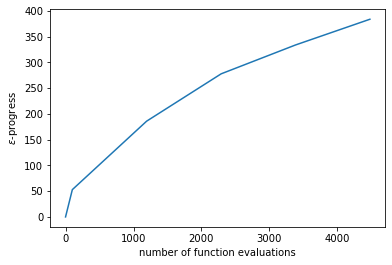

{'epsilon_progress': array([  0,  53, 186, 278, 334, 384], dtype=int64),
 'nfe': array([   0,  100, 1193, 2290, 3383, 4478], dtype=int64)}

In [6]:
plt.plot(convergence_june12['nfe'], convergence_june12['epsilon_progress'])
plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.show()

convergence_june12

The graph does not converge, however it seems as if it will begin to converge

In [35]:
results0 = experiments_june12, convergence_june12 

In [7]:
solutions_df = experiments_june12

In [8]:
# Calculate total costs, number of expected deaths, and RfR total for the three Gelderland dikes
listA = solutions_df[['A.1 Total Costs', 'A.2 Total Costs', 'A.3 Total Costs']]
solutions_df['Total Costs dikes 1-3 (Gelderland)'] = listA.sum(1)

listB = solutions_df[['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths']]
solutions_df['Deaths dikes 1-3 (Gelderland)'] = listB.sum(1)

listC = solutions_df[['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2']]
solutions_df['RfR 1-3 (Gelderland)'] = listC.sum(1)

listG = solutions_df[['0_RfR 0','1_RfR 0', '2_RfR 0']]
solutions_df['Time step 0 - RfR 1-3 (Gelderland)'] = listG.sum(1)


# Calculate total costs, number of expected deaths, and RfR total for the two Overijssel dikes
listD = solutions_df[['A.4 Total Costs', 'A.5 Total Costs']]
solutions_df['Total Costs dikes 4-5 (Overijssel)'] = listD.sum(1)

listE = solutions_df[['A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths']]
solutions_df['Deaths dikes 4-5 (Overijssel)'] = listE.sum(1)

listF = solutions_df[['4_RfR 0', '4_RfR 1', '4_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2']]
solutions_df['RfR 4-5 (Overijssel)'] = listF.sum(1)

listH = solutions_df[['3_RfR 0','4_RfR 0']]
solutions_df['Time step 0 - RfR 4-5 (Overijssel)'] = listH.sum(1)


# Calculate total costs, number of expected deaths, and RfR total for everything to addres RWS
listI = solutions_df[['A.1 Total Costs', 'A.2 Total Costs', 'A.3 Total Costs','A.4 Total Costs', 'A.5 Total Costs', 'RfR Total Costs', 'Expected Evacuation Costs']]
solutions_df['Total Costs all dikes (RWS)'] = listI.sum(1)

selections = solutions_df

Gelderland and Ov.. Deaths for the provinces seperate because we want them low in both cases. As an agggregated analysis can results in unbalanced deaths, more in one province.

RWS we use Total Cost ALL + evacuation costs to evaluate outcomes.

For both we will use:
Domain where we put our constraints
Worst case where we analyze the best worst case scenario

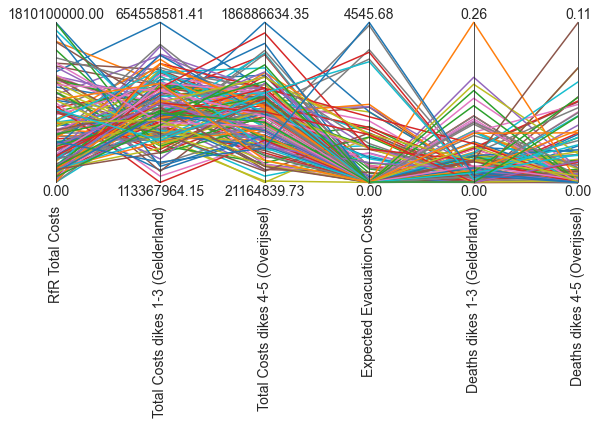

In [9]:
# Plot parallel axes of outcomes of interest. Evacuation costs
# removed because they were similar to deaths. 

from ema_workbench.analysis import parcoords

data = selections.loc[:, ['RfR Total Costs','Total Costs dikes 1-3 (Gelderland)', 'Total Costs dikes 4-5 (Overijssel)', 
                          'Expected Evacuation Costs','Deaths dikes 1-3 (Gelderland)','Deaths dikes 4-5 (Overijssel)']]  # 'RfR 4-5 (Overijssel)','RfR 1-3 (Gelderland)'

limits = parcoords.get_limits(data)

limits.loc[0, ['Deaths dikes 1-3 (Gelderland)','Deaths dikes 4-5 (Overijssel)']] = 0  # 'RfR 4-5 (Overijssel)','RfR 1-3 (Gelderland)'



paraxes = parcoords.ParallelAxes(limits)

paraxes.plot(data)

fig = plt.gcf()
fig.set_size_inches(9,16)

plt.show()

# REDO
Insights for Parcoords: Room for the River total costs seems to have some tradeoffs with the total costs (dike investment and damage costs) of Gelderland and Overijssel. The costs, among other objectives, are optimized, so it makes sense that in the solutions either RfR or dike increases are implemented strongly, or both are moderately implemented. However, these tradeoffs are not very strong. 

The deaths are constrained, so no clear tradeoffs are visible here. However, it is visible that there are more deaths in Overijssel. Since they are still relatively low, this is an acceptable consequence for our commissioner Gelderland.

### FIGURE OUT WHERE TO PUT THIS CODE (FOR FILTER) 

In [39]:
# # Select policies for Gelderland
# logical_deathsG = solutions_df['Deaths dikes 1-3 (Gelderland)'] < 0.0001
# logical_RfRG = solutions_df['Time step 0 - RfR 1-3 (Gelderland)'] == 0

# # Select policies for Overijssel
# logical_deathsO = solutions_df['Deaths dikes 4-5 (Overijssel)'] < 0.0001
# logical_RfRO = solutions_df['Time step 0 - RfR 4-5 (Overijssel)'] == 0
 
# # Sort costs (RWS)
# selections = solutions_df[logical_deathsG & logical_RfRG & logical_deathsO & logical_RfRO]

# Robustness - Domain Criterion and Worst Case

In [10]:
from ema_workbench import Policy

# Create policy objects from selected solutions
policies = selections.drop(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs',
       'A.2_Expected Number of Deaths', 'A.3 Total Costs',
       'A.3_Expected Number of Deaths', 'A.4 Total Costs',
       'A.4_Expected Number of Deaths', 'A.5 Total Costs',
       'A.5_Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs', 'Total Costs dikes 1-3 (Gelderland)',
       'Deaths dikes 1-3 (Gelderland)', 'RfR 1-3 (Gelderland)',
       'Total Costs dikes 4-5 (Overijssel)', 'Deaths dikes 4-5 (Overijssel)',
       'RfR 4-5 (Overijssel)', 'Time step 0 - RfR 1-3 (Gelderland)',
       'Time step 0 - RfR 4-5 (Overijssel)', 'Total Costs all dikes (RWS)'], axis=1)

policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [ ]:
# Re-evaluate candidate solutions under uncertainty
n_scenarios = 200

with MultiprocessingEvaluator(model) as evaluator:
    results_reeval = evaluator.perform_experiments(n_scenarios,policies_to_evaluate)

experiments_reeval, outcomes_reeval = results_reeval

save_results((experiments_reeval, outcomes_reeval), './results_reeval_june16_test_200scenarios.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 200 scenarios * 143 policies * 1 model(s) = 28600 experiments
[MainProcess/INFO] 2860 cases completed
[MainProcess/INFO] 5720 cases completed


In [4]:
experiments_reeval, outcomes_reeval = load_results('results_reeval_june16_test_500scenarios.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Gebruiker\Documents\GitHub\EPA1361_assignments\v8 final assignment\results_reeval_june14_5000nfe_even_higher_eps.tar.gz


In [43]:
outcomes_reeval_df = pd.DataFrame(outcomes_reeval)

# Calculate total costs and number of expected deaths for the three Gelderland dikes
listJ = outcomes_reeval_df[['A.1 Total Costs', 'A.2 Total Costs', 'A.3 Total Costs', 'A.4 Total Costs', 'A.5 Total Costs']]
outcomes_reeval_df['Total Costs ALL'] = listJ.sum(1)

listK = outcomes_reeval_df[['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
                            'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths']]
outcomes_reeval_df['Total Deaths ALL'] = listK.sum(1)   

## Domain Criterion

In [44]:
# Do the same sum in the dictionary for the robustness function
outcomes_reeval['Total Costs All + evacuation'] = sum([outcomes_reeval[column] for column in ['A.1 Total Costs',
                                                                                 'A.2 Total Costs',
                                                                                 'A.3 Total Costs',
                                                                                 'A.4 Total Costs',
                                                                                 'A.5 Total Costs', 
                                                                                 'Expected Evacuation Costs']])

outcomes_reeval['Total Deaths Gelderland'] = sum([outcomes_reeval[column] for column in ['A.1_Expected Number of Deaths',
                                                                                         'A.2_Expected Number of Deaths', 
                                                                                         'A.3_Expected Number of Deaths']])

outcomes_reeval['Total Deaths Overijssel'] = sum([outcomes_reeval[column] for column in ['A.4_Expected Number of Deaths', 
                                                                                         'A.5_Expected Number of Deaths']])


keys_robustness = ['Total Costs All + evacuation', 'Total Deaths Gelderland', 'Total Deaths Overijssel']
outcomes_robustness = {x:outcomes_reeval[x] for x in keys_robustness}

outcomes_robustness_df = pd.DataFrame(outcomes_robustness)
outcomes_robustness_df.sort_values(['Total Costs All + evacuation'])

,Total Costs All + evacuation,Total Deaths Gelderland,Total Deaths Overijssel
10309,1.619283e+08,0.005326,0.000000
10374,1.636105e+08,0.014405,0.000211
10327,1.649183e+08,0.003481,0.006093
10346,1.686386e+08,0.014292,0.001013
10395,1.729071e+08,0.014290,0.000000
...,...,...,...
12191,4.750063e+09,4.432107,0.000000
11291,4.837618e+09,4.850406,0.000000
11391,4.850048e+09,1.767057,0.000000
12110,4.916064e+09,4.070055,0.000000


In [45]:
# Robustness for domain criteria - costs (all types) and deaths

import functools
import numpy as np

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

    
SMALLER = 'SMALLER'
LARGER = 'LARGER'

deaths = functools.partial(robustness, SMALLER, 0.00005) # Half of 0.0001 for both Provinces
costs = functools.partial(robustness, SMALLER, 6e+8) #sum of investment + annual damages + evacuation
### REDEFINE THRESHOLDS BASED ON FINAL REEVAL RESULTS

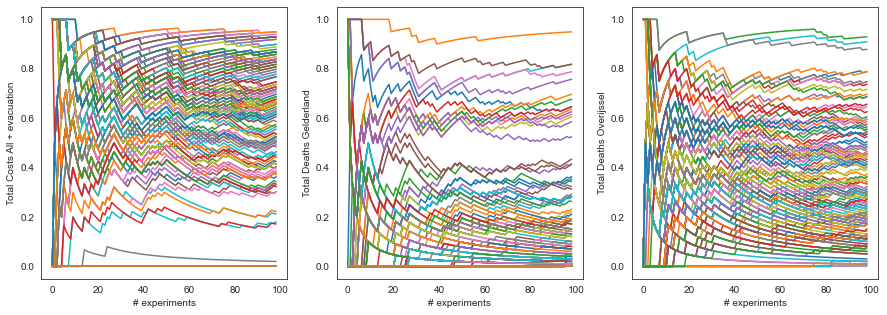

In [53]:
# Plotting robustness for domain criteria - costs (all types) and deaths

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5),
                        sharex=True)

axes = [axes[0],axes[1],axes[2]]

robustness_funcs = {"Total Costs All + evacuation": costs, 
                    "Total Deaths Gelderland": deaths,
                    "Total Deaths Overijssel": deaths
                    }

robustness_scores = []

for ax, (outcome, value) in zip(axes, outcomes_robustness.items()):
    for policy in np.unique(experiments_reeval['policy']):
        logical = experiments_reeval['policy'] == policy
        data = value[logical]
        
        robustness = []
        
       # data.shape should be (100,), given n_scenarios=100
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        
        ax.plot(robustness, label=policy)
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)
    


Analysis Robustness: From the figures it is visible that robustness converges from around **100?** experiments. Therefore, this is a sufficient number of experiments to measure the robustness of the outcomes.

The first figure shows the room for the river total costs, which do not differ within one policy. The robustness is plotted at 0 or 1 because it either never fits our criteria (being greater than 5e+08), plotted at 0, or always fits out criteria, plotted at 1. Measuring the robustness of this outcome is therefore not meaningful and will not be considered further.
  

In [54]:
robustness_funcs

{'Total Costs All + evacuation': functools.partial(<function robustness at 0x000001A8AAFE8CA0>, 'SMALLER', 600000000.0),
 'Total Deaths Gelderland': functools.partial(<function robustness at 0x000001A8AAFE8CA0>, 'SMALLER', 5e-05),
 'Total Deaths Overijssel': functools.partial(<function robustness at 0x000001A8AAFE8CA0>, 'SMALLER', 5e-05)}

In [55]:
robustness=[]
poly = []

for policy in policy.unique():
    robustness.append(robustness_funcs[outcome](data))
    
    
for outcome, value in  outcomes_robustness.items():
    for policy in np.unique(experiments_reeval['policy']):
        logical = experiments_reeval['policy'] == policy
        data = value[logical]
        
        robustness.append(robustness_funcs[outcome](data))
        poly.append(policy)
        
        ax.plot(robustness, label=policy)

AttributeError: 'numpy.int64' object has no attribute 'unique'

# FIX HEATMEAP

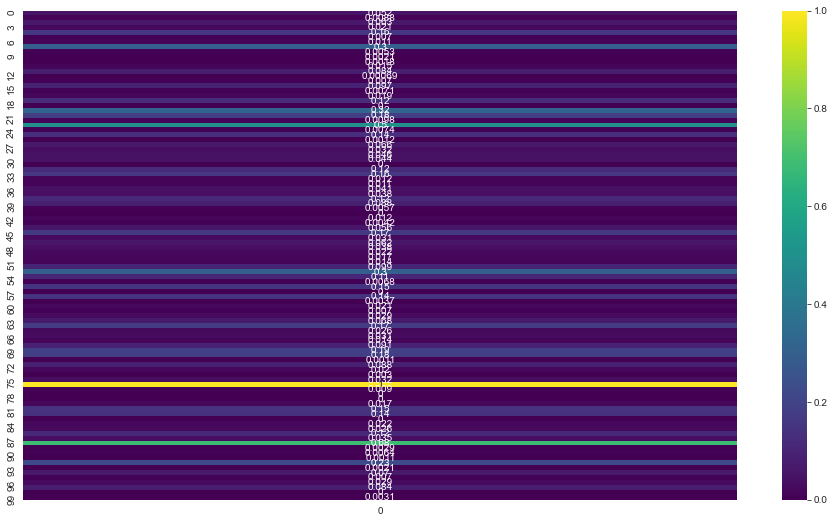

In [56]:
# Plot regret

plt.figure(figsize=(16,9))

rob = pd.DataFrame(data)
sns.heatmap(rob/rob.max(), cmap='viridis', annot=True)


plt.show()

### Worst Case using Minimax Regret

In [57]:
# Calculate regret for all outcomes of interest
# Check if min/max is correct! Changed from original

def calculate_regret(data, best):
    return np.abs(best-data)


overall_regret = {}
max_regret = {}
for outcome in outcomes_robustness.keys():
    policy_column = experiments_reeval['policy']
    
    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome: outcomes_reeval[outcome], 
                         "policy":experiments_reeval['policy'],
                         "scenario":experiments_reeval['scenario']})
    
    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)
    
    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    #
    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    #
    outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()
    
    overall_regret[outcome] = outcome_regret
    max_regret[outcome] = outcome_regret.max()
    

<ipython-input-57-d4377c7d6d99>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()


INTERPRET HEAT MAP WITH ALL SOLUTIONS (no filter)

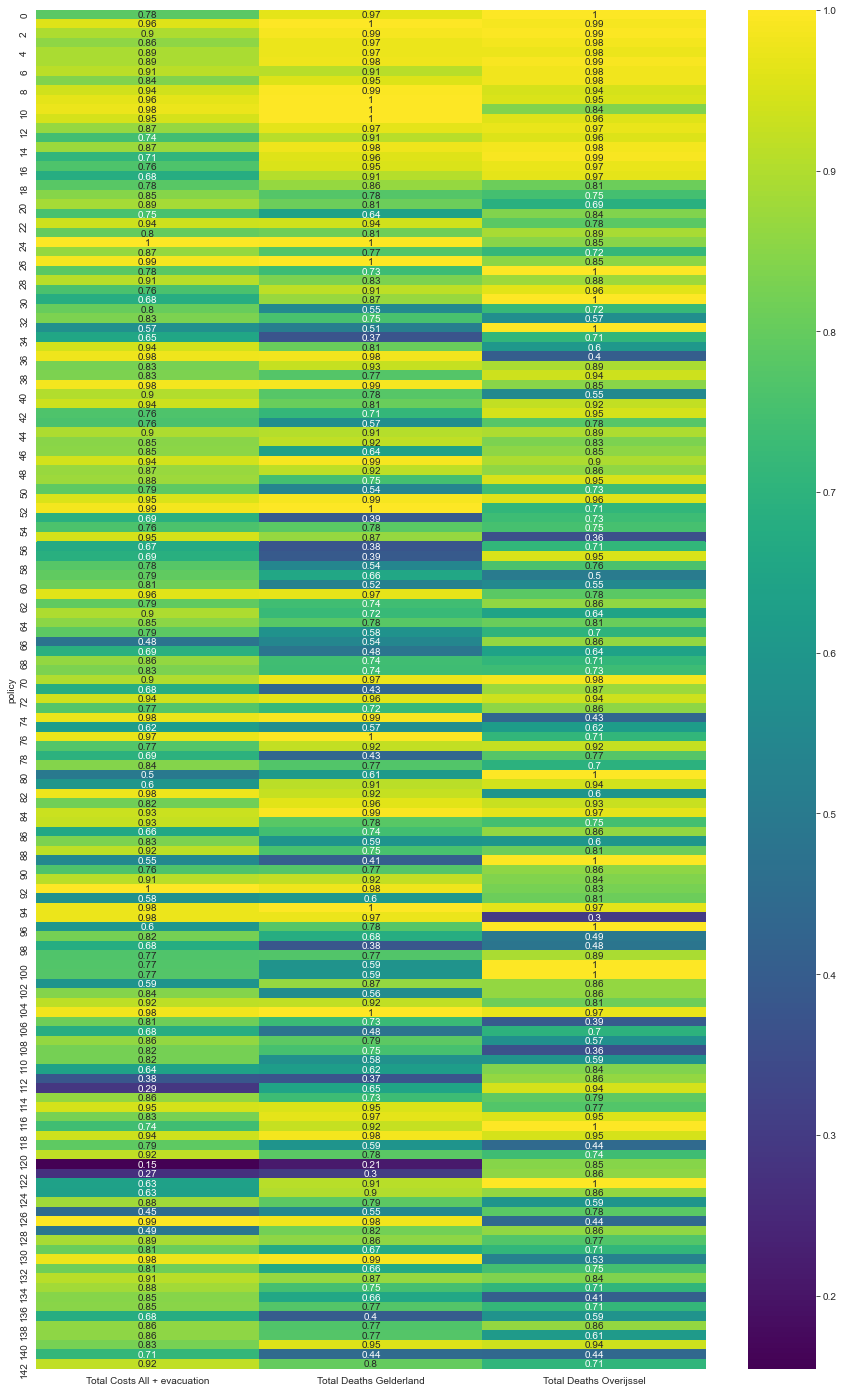

In [58]:
# Plot regret
plt.figure(figsize=(15,25))

max_regret = pd.DataFrame(max_regret)
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True)


plt.show()

Interpretation of heatmap here ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [59]:
# what is the worst of all scenarios (values)

max_regret.max()

Total Costs All + evacuation    4.840262e+09
Total Deaths Gelderland         5.035509e+00
Total Deaths Overijssel         1.129728e+00
dtype: float64

look into policy 98, 137,141

In [61]:
worst_case_df = max_regret/max_regret.max()

# Ranking based on robustness (chosen level <= 0.4)
# cost_rank = worst_case_df['Total Costs All + evacuation'] <= 0.7
G_death_rank = worst_case_df['Total Deaths Gelderland'] <= 0.6
O_death_rank = worst_case_df['Total Deaths Overijssel'] <= 0.6

# # Selection with high robustness
worst_case_rank = worst_case_df[G_death_rank & O_death_rank]
worst_case_rank.sort_values(['Total Costs All + evacuation'])

,Total Costs All + evacuation,Total Deaths Gelderland,Total Deaths Overijssel
policy,,,
98,0.677983,0.381263,0.484112
137,0.679763,0.400060,0.589741
141,0.713868,0.444376,0.436194
119,0.790004,0.592817,0.443990
60,0.812705,0.522409,0.553317
110,0.824840,0.579798,0.589356
87,0.834082,0.590812,0.597094


## NEXT STEPS

1. Rank them based on robustness
2. Find solutions with high robustness scores for different actors/outcomes and robustness metrics (dependent on robustness scores that we see) --> different lists for different metrics
If there are clear similarities (same solutions occur often)
3. Decide what is/isn't a policy recommendation and why

if there are no similarities... 
4. Present policies for Gelderland based on their problem framing, discuss aspects that other actors might want differently, trade-offs and also recommend policies that might have a better chance with other actors

## Run Model with no policy

In [ ]:
# # multiprocessing
# with MultiprocessingEvaluator(model) as evaluator:
#     experiments_pol0, outcomes_pol0 = evaluator.perform_experiments(scenarios=500, policies=policy0,
#                                                                     uncertainty_sampling=SOBOL)


In [ ]:

# save_results((experiments_pol0, outcomes_pol0), './results_pol0.tar.gz')


In [ ]:
# experiments_pol0, outcomes_pol0 = load_results('./results_pol0.tar.gz')
# ref_pol0 = experiments_pol0, outcomes_pol0

## Run model with default scenario

In [ ]:
# # multiprocessing
# with MultiprocessingEvaluator(model) as evaluator:
#     experiments_ref_scen, outcomes_ref_scen = evaluator.perform_experiments(scenarios=ref_scenario, policies=10000,
#                                                                     uncertainty_sampling=SOBOL)


In [ ]:
# save_results((experiments_ref_scen, outcomes_ref_scen), './results_ref_scen.tar.gz')

In [ ]:
# experiments_ref_scen, outcomes_ref_scen = load_results('./results_ref_scen.tar.gz')
# ref_scen_results = experiments_ref_scen, outcomes_ref_scen 

## only gelderland dike policies

In [ ]:
# with MultiprocessingEvaluator(model2) as evaluator:
#     experiments_gel_pol, outcomes_gel_pol = evaluator.perform_experiments(scenarios=1, policies=policy_gel,
#                                                                     uncertainty_sampling=LHS)


In [ ]:
# experiments_gel_pol['A.2_DikeIncrease 0']

## Set up heatmaps

In [ ]:
# #for no policy
# from SALib.analyze.sobol import analyze
# from SALib.analyze import sobol

# Si = sobol.analyze(problem, outcomes_pol0, calc_second_order=False, print_to_console=False)

# damage_results_pol0 = {}
# cost_results_pol0 = {}
# death_results_pol0 = {}

# for scenario in experiments_pol0.scenario.unique():
#     logical = experiments_pol0.scenario == scenario
#     y_damage_pol0 = outcomes_pol0['Expected Annual Damage'][logical]
#     y_cost_pol0 = outcomes_pol0['Total Investment Costs'][logical]
#     y_death_pol0 = outcomes_pol0['Expected Number of Deaths'][logical]
#     indices_damage_pol0 = analyze(problem, y_damage_pol0)
#     indices_cost_pol0 = analyze(problem, y_cost_pol0)
#     indices_death_pol0 = analyze(problem, y_death_pol0)
    
#     damage_results_pol0[scenario] = indices_damage_pol0
#     cost_results_pol0[scenario] = indices_cost_pol0
#     death_results_pol0[scenario] = indices_death_pol0

In [ ]:
# #for ref_scenario

# experiments_ref_scen, outcomes_ref_scen = ref_scen_results 

# damage_results_ref_scen = {}
# cost_results_ref_scen = {}
# death_results_ref_scen = {}

# for policy in experiments_ref_scen.policy.unique():
#     logical = experiments_pol0.policy == policy
#     y_damage_ref_scen = outcomes_ref_scen['Expected Annual Damage'][logical]
#     y_cost_ref_scen = outcomes_ref_scen['Total Investment Costs'][logical]
#     y_death_ref_scen = outcomes_ref_scen['Expected Number of Deaths'][logical]
#     indices_damage_ref_scen = analyze(problem_ref_scen, y_damage_ref_scen)
#     indices_cost_ref_scen = analyze(problem_ref_scen, y_cost_ref_scen)
#     indices_death_ref_scen = analyze(problem_ref_scen, y_death_ref_scen)
    
#     damage_results_ref_scen[policy] = indices_damage_ref_scen
#     cost_results_ref_scen[policy] = indices_cost_ref_scen
#     death_results_ref_scen[policy] = indices_death_ref_scen

#### No policy heatmap

In [ ]:
# from ema_workbench.analysis import feature_scoring

# fig = plt.figure(figsize=(8, 20))

# for policy in experiments_pol0.policy.unique():
#     plt.figure(figsize=(8, 20), dpi=100)
#     logical = experiments_pol0.policy == policy
#     subset_results = {k:v[logical] for k,v in outcomes_pol0.items()}
#     scores = feature_scoring.get_feature_scores_all(experiments_pol0[logical],
#                                                    subset_results)
#     sns.heatmap(scores, annot=True, cmap='viridis')
#     plt.savefig('NoPolicy_heatmap.png', bbox_inches='tight')
#     plt.show()

#### ref_scenario heatmap

In [ ]:
# from ema_workbench.analysis import feature_scoring

# fig2 = plt.figure(figsize=(8, 20))

# for scenario in experiments_ref_scen.scenario.unique():
#     plt.figure(figsize=(8, 20), dpi=100)
#     logical = experiments_ref_scen.scenario == scenario
#     subset_results = {k:v[logical] for k,v in outcomes_ref_scen.items()}
#     scores = feature_scoring.get_feature_scores_all(experiments_ref_scen[logical],
#                                                    subset_results)
#     sns.heatmap(scores, annot=True, cmap='viridis')
#     plt.savefig('ref_scen_heatmap.png', bbox_inches='tight')
#     plt.show()

# Policy optimization

Our focus should be on dikes 1, 2 and 3. A4 and A5 fall within the responsibility of Overijssel. Therefore we should create policies that are implemented on these 3 locations. If possible, we should also look to minimize the following goals at these locations. If not possible, we will look at the overall damages and death, along the entire river chain. 

Following goals:
- Least deaths (the risk of death for everyon behind the dikes by 2050 is less than or equal to 1 in 100.000 per year (0.001%)
- Least expected annual damage
------------------------------
Which policies produce these and what are the cost estimations?

In [ ]:
# convergence_metrics = [EpsilonProgress()]

# epsilon = [0.1,] * len(model.outcomes)

# nfe = 2000

# n_scenarios = 2000
# scenario_re = sample_uncertainties(model, n_scenarios)

# with MultiprocessingEvaluator(model) as evaluator:
#      results, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
#                                                epsilons=epsilon, convergence=convergence_metrics,
#                                                   )

In [ ]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)
# fig, ax1 = plt.subplots(ncols=1)
# ax1.plot(convergence.epsilon_progress)
# ax1.set_xlabel('nr. of generations')
# ax1.set_ylabel('$\epsilon$ progress')
# sns.despine()

In [ ]:
# import functools

# def robustness(direction, threshold, data):
#     if direction == SMALLER:
#         return np.sum(data<=threshold)/data.shape[0]
#     else:
#         return np.sum(data>=threshold)/data.shape[0]

# def costs(data):
#     return data[0]/1e9 # makes numbers nicer
    
# SMALLER = 'SMALLER'

# Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-5) #not ok
# Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e4) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
# Total_Investment_Costs = costs


# MAXIMIZE = ScalarOutcome.MAXIMIZE
# MINIMIZE = ScalarOutcome.MINIMIZE

# funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
#          'Expected Annual Damage': Expected_Annual_Damage,
#          'Total Investment Costs': Total_Investment_Costs}

# robustnes_functions = [ScalarOutcome('fraction EA deaths', kind=MINIMIZE, 
#                              variable_name='Expected Number of Deaths', function=Expected_Number_of_Deaths),
#                        ScalarOutcome('fraction EA damage', kind=MINIMIZE, 
#                              variable_name='Expected Annual Damage', function=Expected_Annual_Damage),
#                        ScalarOutcome('investment costs', kind=MINIMIZE, # note that we have to minimize costs!
#                              variable_name='Total Investment Costs', function=Total_Investment_Costs)]

In [ ]:
# from ema_workbench.em_framework.optimization import (HyperVolume, 
#                                                      EpsilonProgress)

# convergence = [HyperVolume(minimum=[0,0,0], maximum=[1.1, 1.1, 3]),
#               EpsilonProgress()]

# n_scenarios = 100
# scenarios_re = sample_uncertainties(model, n_scenarios)
# nfe = int(1e3)

# epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1

# with MultiprocessingEvaluator(model) as evaluator:
#     results, convergence = evaluator.robust_optimize(robustnes_functions, scenarios = scenarios_re, nfe=nfe,
#                                                      convergence=convergence, epsilons=epsilons)